In [1]:
import warnings 
warnings.simplefilter('ignore')
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Data cleaning

In [3]:
df =  pd.read_csv('SPAM.csv')
df

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
data = df.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [5]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
data.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


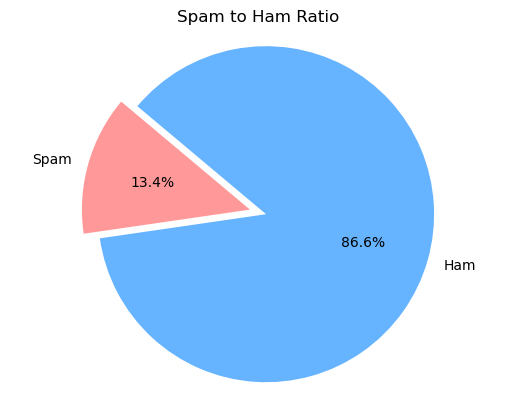

In [7]:
# Mapping 'spam' to 0 and 'ham' to 1
data['Category'] = data['Category'].map({'spam': 0, 'ham': 1})

# Count the number of spam and ham messages
spam_count = data['Category'].value_counts()[0]
ham_count = data['Category'].value_counts()[1]

# Create a pie plot
labels = ['Spam', 'Ham']
sizes = [spam_count, ham_count]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Spam)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Spam to Ham Ratio')
plt.show()


## Feature extraction

In [8]:
data.dtypes

Category     int64
Message     object
dtype: object

In [9]:
data.loc[data['Category'] == 'spam', 'Category',] = 0
data.loc[data['Category'] == 'ham', 'Category',] = 1

In [10]:
data['Category'].value_counts()

Category
1    4825
0     747
Name: count, dtype: int64

In [11]:
X = data['Message']

Y = data['Category']

In [12]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [13]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [14]:
# Separate spam and ham messages
spam_messages = X[Y == 0]
ham_messages = X[Y == 1]

# Vectorize spam messages
vectorizer_spam = CountVectorizer()
X_spam = vectorizer_spam.fit_transform(spam_messages)

# Vectorize ham messages
vectorizer_ham = CountVectorizer()
X_ham = vectorizer_ham.fit_transform(ham_messages)

# Get the count of words in spam messages
spam_word_count = pd.DataFrame(X_spam.sum(axis=0), columns=vectorizer_spam.get_feature_names_out())
spam_word_count = spam_word_count.T.rename(columns={0: 'Count in Spam'})
spam_word_count = spam_word_count.sort_values(by='Count in Spam', ascending=False)  # Sort by count

# Get the count of words in ham messages
ham_word_count = pd.DataFrame(X_ham.sum(axis=0), columns=vectorizer_ham.get_feature_names_out())
ham_word_count = ham_word_count.T.rename(columns={0: 'Count in Ham'})
ham_word_count = ham_word_count.sort_values(by='Count in Ham', ascending=False)  # Sort by count

In [15]:
print("Word count in spam messages (ascending order):")
spam_word_count.head(10)

Word count in spam messages (ascending order):


,Count in Spam
to,688
call,355
you,297
your,264
free,224
the,206
for,203
now,199
or,188
txt,163


In [16]:
print("\nWord count in ham messages (ascending order):")
ham_word_count.head(10)


Word count in ham messages (ascending order):


,Count in Ham
you,1943
to,1554
the,1122
and,857
in,818
me,772
my,750
is,732
it,711
that,551


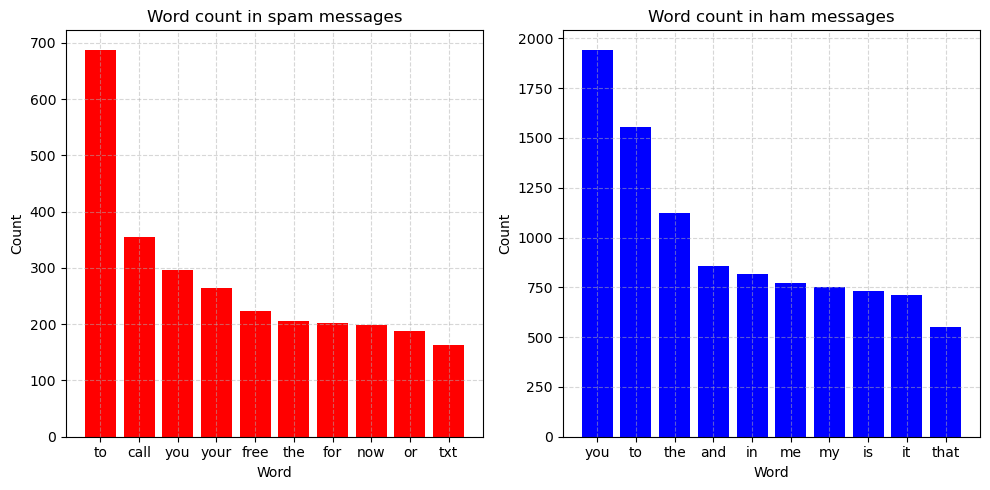

In [17]:
# Plot histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(spam_word_count.index[:10], spam_word_count['Count in Spam'][:10], color='red')
plt.title('Word count in spam messages')
plt.xlabel('Word')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)  # Grid pattern

plt.subplot(1, 2, 2)
plt.bar(ham_word_count.index[:10], ham_word_count['Count in Ham'][:10], color='blue')
plt.title('Word count in ham messages')
plt.xlabel('Word')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)  # Grid pattern
plt.tight_layout()
plt.show()

## Model train and test

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [20]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [21]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [22]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# LOGISTIC REGRESSION

In [23]:
lr = LogisticRegression()
lr.fit(X_train_features, Y_train)


lr_train = lr.predict(X_train_features)
lr_test = lr.predict(X_test_features)

        
lr_train_acc = accuracy_score(Y_train, lr_train)
lr_test_acc = accuracy_score(Y_test, lr_test)


lr_precision = precision_score(Y_test, lr_test)
lr_recall = recall_score(Y_test, lr_test)
lr_f1 = f1_score(Y_test, lr_test)


print("Logistic Regression:\n")
print("Training Data Accuracy:", lr_train_acc)
print("Testing Data Accuracy :", lr_test_acc)

print("Precision             :", lr_precision)
print("Recall                :", lr_recall)
print("F1 Score              :", lr_f1)

Logistic Regression:

Training Data Accuracy: 0.9661207089970832
Testing Data Accuracy : 0.9623318385650225
Precision             : 0.959
Recall                : 0.9989583333333333
F1 Score              : 0.9785714285714285


# DECISION TREES

In [24]:
dtrees = DecisionTreeClassifier()
dtrees.fit(X_train_features, Y_train)


dt_train = dtrees.predict(X_train_features)
dt_test = dtrees.predict(X_test_features)


dt_train_acc = accuracy_score(Y_train, dt_train)
dt_test_acc = accuracy_score(Y_test, dt_test)


dt_precision = precision_score(Y_test, dt_test)
dt_recall = recall_score(Y_test, dt_test)
dt_f1 = f1_score(Y_test, dt_test)


print("Decision Tress:\n")
print("Training Data Accuracy:", dt_train_acc)
print("Testing Data Accuracy :", dt_test_acc)

print("Precision             :", dt_precision)
print("Recall                :", dt_recall)
print("F1 Score              :", dt_f1)

Decision Tress:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.9641255605381166
Precision             : 0.9713114754098361
Recall                : 0.9875
F1 Score              : 0.9793388429752066


# K NEAREST NEIGHBORS

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train_features, Y_train)


knn_train = knn.predict(X_train_features)
knn_test = knn.predict(X_test_features)


knn_train_acc = accuracy_score(Y_train, knn_train)
knn_test_acc = accuracy_score(Y_test, knn_test)


knn_precision = precision_score(Y_test, knn_test)
knn_recall = recall_score(Y_test, knn_test)
knn_f1 = f1_score(Y_test, knn_test)


print("K Nearest Neighbors:\n")
print("Training Data Accuracy:", knn_train_acc)
print("Testing Data Accuracy :", knn_test_acc)

print("Precision             :", knn_precision)
print("Recall                :", knn_recall)
print("F1 Score              :", knn_f1)

K Nearest Neighbors:

Training Data Accuracy: 0.9199012788871438
Testing Data Accuracy : 0.905829596412556
Precision             : 0.9014084507042254
Recall                : 1.0
F1 Score              : 0.9481481481481481


# RANDOM FOREST

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train_features, Y_train)


rf_train = rf.predict(X_train_features)
rf_test = rf.predict(X_test_features)


rf_train_acc = accuracy_score(Y_train, rf_train)
rf_test_acc = accuracy_score(Y_test, rf_test)


rf_precision = precision_score(Y_test, rf_test)
rf_recall = recall_score(Y_test, rf_test)
rf_f1 = f1_score(Y_test, rf_test)


print("Random Forest:\n")
print("Training Data Accuracy:", rf_train_acc)
print("Testing Data Accuracy :", rf_test_acc)   
           
print("Precision             :", rf_precision)
print("Recall                :", rf_recall)
print("F1 Score              :", rf_f1)

Random Forest:

Training Data Accuracy: 1.0
Testing Data Accuracy : 0.9802690582959641
Precision             : 0.9785714285714285
Recall                : 0.9989583333333333
F1 Score              : 0.9886597938144329


# Metrics Visualization

In [27]:
train_acc_list = {"LR":lr_train_acc,
                  "DT":dt_train_acc,
                  "KNN":knn_train_acc,
                  "RF":rf_train_acc}
test_acc_list = {"LR":lr_test_acc,
                  "DT":dt_test_acc,
                  "KNN":knn_test_acc,
                  "RF":rf_test_acc}
precision_list = {"LR":lr_precision,
                  "DT":dt_precision,
                  "KNN":knn_precision,
                  "RF":rf_precision}
recall_list = {"LR":lr_recall,
               "DT":dt_recall,
               "KNN":knn_recall,
               "RF":rf_recall}
f1_list = {"LR":lr_f1,
            "DT":dt_f1,
            "KNN":knn_f1,
            "RF":rf_f1}

In [28]:
a1 =  pd.DataFrame.from_dict(train_acc_list, orient = 'index', columns = ["Traning Accuracy"])
a2 =  pd.DataFrame.from_dict(test_acc_list, orient = 'index', columns = ["Testing Accuracy"])
a3 =  pd.DataFrame.from_dict(precision_list, orient = 'index', columns = ["Precision Score"])
a4 =  pd.DataFrame.from_dict(recall_list, orient = 'index', columns = ["Recall Score"])
a5 =  pd.DataFrame.from_dict(f1_list, orient = 'index', columns = ["F1 Score"])
org = pd.concat([a1, a2, a3, a4, a5], axis = 1)
org

,Traning Accuracy,Testing Accuracy,Precision Score,Recall Score,F1 Score
LR,0.966121,0.962332,0.959000,0.998958,0.978571
DT,1.000000,0.964126,0.971311,0.987500,0.979339
KNN,0.919901,0.905830,0.901408,1.000000,0.948148
RF,1.000000,0.980269,0.978571,0.998958,0.988660


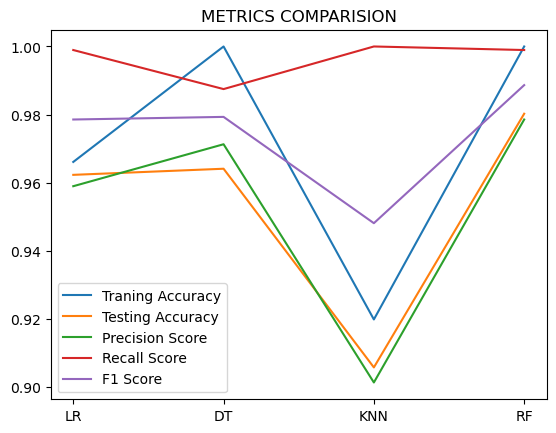

In [29]:
alg = ['LR','DT','KNN','RF']
plt.plot(alg,a1)
plt.plot(alg,a2)
plt.plot(alg,a3)
plt.plot(alg,a4)
plt.plot(alg,a5)
legend = ['Traning Accuracy', 'Testing Accuracy',
          'Precision Score', 'Recall Score',
          'F1 Score']
plt.title("METRICS COMPARISION")
plt.legend(legend)
plt.show()

# GUI

In [30]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Define function to classify and display result
def classify_and_display_result():
    input_mail = text_box.get("1.0", "end-1c")  # Retrieve text from the text box
    selected_model = model_combobox.get()  # Get the selected model
    
    if not input_mail:  # Check if the text box is empty
        messagebox.showerror("Error", "Please enter mail's content.")
        return
    
    if not selected_model:  # Check if a model is selected
        messagebox.showerror("Error", "Please select a model.")
        return
    
    prediction = fit_vectorizer_and_classify(input_mail, selected_model)
    
    if prediction is not None:
        if prediction == 0:
            result_label.config(text="SPAM MAIL", fg="red")
        else:
            result_label.config(text="HAM MAIL", fg="green")

# Initialize Tkinter
root = tk.Tk()
root.title("Spam Classification")

# Create main window
root.title("Spam Classification")

# Create text box
label = tk.Label(root, text="Enter mail's contents:")
label.pack()
text_box = tk.Text(root, height=10, width=50)
text_box.pack()

# Create model selection dropdown
model_label = tk.Label(root, text="Select Model:")
model_label.pack()
models = ["Logistic Regression", "Decision Trees", "K Nearest Neighbors", "Random Forest"]
model_combobox = ttk.Combobox(root, values=models)
model_combobox.pack()

# Create button to classify mail
classify_button = tk.Button(root, text="Classify Mail", command=classify_and_display_result)
classify_button.pack()

# Label to display result
result_label = tk.Label(root, text="", font=("Helvetica", 16))
result_label.pack()

# Initialize TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

# Function to fit vectorizer and classify
def fit_vectorizer_and_classify(input_mail, selected_model):
    # Fit TF-IDF vectorizer with training data
    X_train_features = feature_extraction.fit_transform(X_train)
    
    # Transform input mail into features
    input_mail_features = feature_extraction.transform([input_mail])
    
    # Perform classification based on selected model
    if selected_model == "Logistic Regression":
        model = LogisticRegression()
    elif selected_model == "Decision Trees":
        model = DecisionTreeClassifier()
    elif selected_model == "K Nearest Neighbors":
        model = KNeighborsClassifier()
    elif selected_model == "Random Forest":
        model = RandomForestClassifier()
    else:
        messagebox.showerror("Error", "Invalid model selected.")
        return None
    
    # Train the model and classify the input mail
    model.fit(X_train_features, Y_train)
    prediction = model.predict(input_mail_features)
    return prediction

# Start the GUI application
root.mainloop()
